<a href="https://colab.research.google.com/github/icebearian/CS115-Mathematics-for-Computer-Science/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tập dữ liệu:** Social Network Ads.<br>
**Mô tả dữ liệu:** Gồm 400 tập dữ liệu thông tin khách hàng và cho biết khách hàng có mua sản phẩm hay không.<br>
**Thuộc tính:**
+ **UserID**: Mã số định danh của người dùng.
+ **Gender**: Giới tính của người dùng.
+ **Age**: Độ tuổi người dùng.
+ **Estimated Salary**: Mức lương ước đoán của người dùng.
+ **Purchased**: Là một trong hai số 0 và 1. Số 0 cho biết khách
hàng không mua hàng và số 1 cho biết khách hàng có mua
hàng

In [50]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [51]:
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.colors 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [52]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [53]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09fad7e7f0>,
      dtype=object)

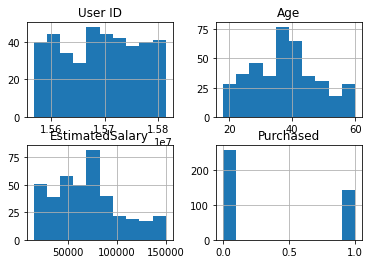

In [54]:
dataset.hist()

# **Tiền xử lý dữ liệu**
> Ở đây ta cần chọn thuộc tính Input (X) là **Age** và **Estimated Salary** và Output (Y) là **Purchased**.

In [55]:
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

# **Chuẩn hoá dữ liệu**

In [56]:
sc = StandardScaler()
X= sc.fit_transform(X)

# **Chia tập dữ liệu thành bộ train và bộ test**

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 0)

# **Trực quan hoá dữ liệu**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


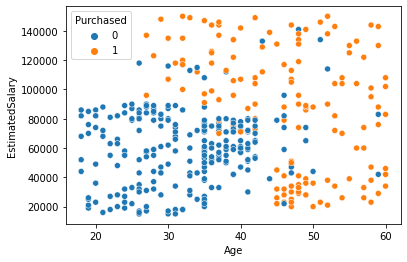

In [58]:
sns.scatterplot('Age', 'EstimatedSalary', data = dataset, hue = 'Purchased')

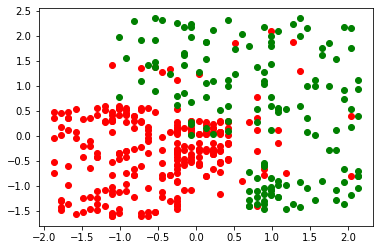

In [59]:
def VisualizingDataset(X_, Y_):
  X1 = X_[:, 0]
  X2 = X_[:, 1]
  for i, label in enumerate(np.unique(Y_)):
    plt.scatter(X1[Y_ == label], X2[Y_ == label],
  color = ListedColormap(("red", "green"))(i))
VisualizingDataset(X, Y)
plt.show()

# **Huấn luyện mô hình**
> Sử dụng lớp SVC trong module sklearn.svm để huấn luyện mô
hình.<br>
> Ta sẽ sử dụng kernel Radian Basic Function cho Kernel SVM.
Kernel này được thiết lập với tham số kernel =
"rbf".


In [60]:
classifier1 = SVC(kernel='linear',random_state=0)
classifier1.fit(X_train, Y_train)
Ac_score = accuracy_score(Y_test, classifier1.predict(X_test))
Pr_score = precision_score(Y_test, classifier1.predict(X_test))
Re_score = recall_score(Y_test, classifier1.predict(X_test))
F1_score = f1_score(Y_test, classifier1.predict(X_test))
print("Model      : Linear SVM")
print('Accuracy   : {:0.2f}'.format(Ac_score))
print('Precision  : {:0.2f}'.format(Pr_score))
print('Recall     : {:0.2f}'.format(Re_score))
print('F1-Score   : {:0.2f}'.format(F1_score))
print('===================')
classifier = SVC(kernel ="rbf")
classifier.fit(X_train, Y_train)
Ac_score = accuracy_score(Y_test, classifier.predict(X_test))
Pr_score = precision_score(Y_test, classifier.predict(X_test))
Re_score = recall_score(Y_test, classifier.predict(X_test))
F1_score = f1_score(Y_test, classifier.predict(X_test))
print("Model      :Kernel SVM")
print('Accuracy   : {:0.2f}'.format(Ac_score))
print('Precision  : {:0.2f}'.format(Pr_score))
print('Recall     : {:0.2f}'.format(Re_score))
print('F1-Score   : {:0.2f}'.format(F1_score))


Model      : Linear SVM
Accuracy   : 0.90
Precision  : 0.92
Recall     : 0.75
F1-Score   : 0.83
Model      :Kernel SVM
Accuracy   : 0.93
Precision  : 0.88
Recall     : 0.91
F1-Score   : 0.89


# **Trực quan hoá kết quả mô hình**

In [61]:
from matplotlib.colors import ListedColormap
def VisualizingResult(model, X_):
  X1 = X_[:, 0]
  X2 = X_[:, 1]
  X1_range = np.arange(start= X1.min()-1, stop= X1.max()+1, step =0.01)
  X2_range = np.arange(start= X2.min()-1, stop= X2.max()+1, step =0.01)
  X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
  X_grid= np.array([X1_matrix.ravel(), X2_matrix.ravel()]).T
  Y_grid= model.predict(X_grid).reshape(X1_matrix.shape)
  plt.contourf(X1_matrix, X2_matrix, Y_grid, alpha = 0.5,cmap = ListedColormap(("gold", "limegreen")))

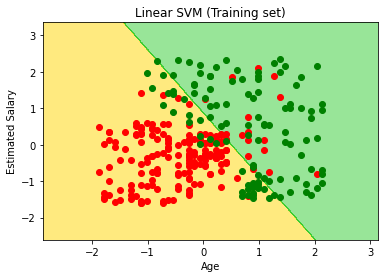

In [62]:
VisualizingResult(classifier1, X_train)
VisualizingDataset(X_train, Y_train)
plt.title('Linear SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

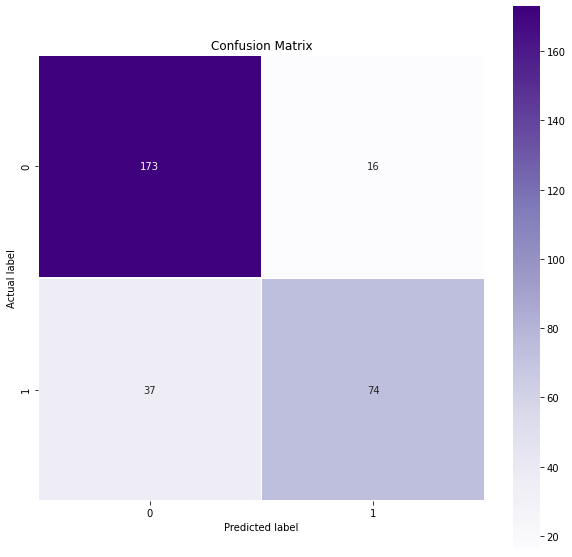

In [63]:
cm = confusion_matrix(Y_train, classifier1.predict(X_train))
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,fmt='.0f', linewidths = 0.5, square = True, cmap='Purples')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

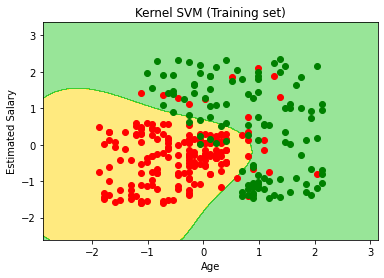

In [64]:
VisualizingResult(classifier, X_train)
VisualizingDataset(X_train, Y_train)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

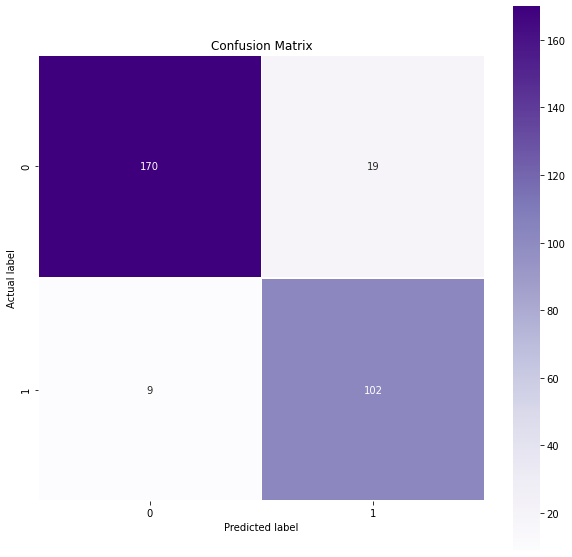

In [65]:
cm = confusion_matrix(Y_train, classifier.predict(X_train))
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,fmt='.0f', linewidths = 0.5, square = True, cmap='Purples')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

# **Kiểm tra kết quả trên tập test**


In [66]:
cm = confusion_matrix(Y_test, classifier.predict(X_test))
print(cm)
#plt.figure(figsize=(10,10))
#sns.heatmap(cm, annot=True,fmt='.0f', linewidths = 0.5, square = True, cmap='Purples')
#plt.xlabel('Predicted label')
#plt.ylabel('Actual label')
#plt.title('Confusion Matrix')
#plt.show()

[[64  4]
 [ 3 29]]
